In [1]:
import torch 
import torch.nn as nn 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
dataset=pd.read_csv('/Users/withmocha/Library/CloudStorage/OneDrive-SejongUniversity/3학년 1학기/파이썬기반딥러닝/수업자료/week2/car_evaluation.csv')

dataset.head()

,price,maint,doors,persons,lug_capacity,safety,output
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


<Axes: ylabel='count'>

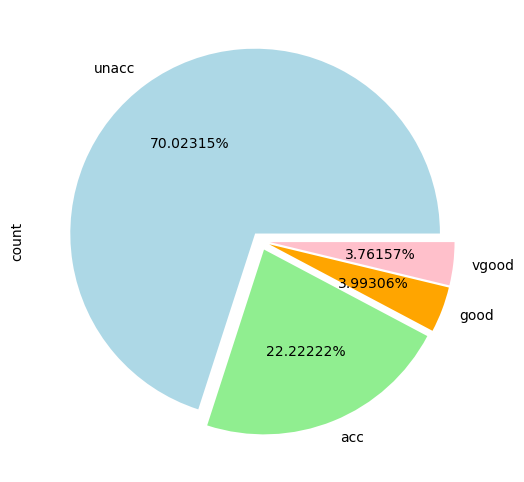

In [3]:
fig_size=plt.rcParams["figure.figsize"]
fig_size[0]=8
fig_size[1]=6
plt.rcParams["figure.figsize"]=fig_size
dataset.output.value_counts().plot(kind='pie',autopct='%0.05f%%',
                                   colors=['lightblue','lightgreen','orange','pink'],explode=(0.05,0.05,0.05,0.05))


In [4]:
categorical_columns=['price','maint','doors','persons','lug_capacity','safety']


for category in categorical_columns:
    dataset[category]=dataset[category].astype('category')
    
price=dataset['price'].cat.codes.values
maint=dataset['maint'].cat.codes.values
doors=dataset['doors'].cat.codes.values

In [6]:
persons=dataset['persons'].cat.codes.values 
lug_capacity=dataset['lug_capacity'].cat.codes.values
safety=dataset['safety'].cat.codes.values

categorical_data=np.stack([price,maint,doors,persons,lug_capacity,safety],1)
categorical_data[:10]

array([[3, 3, 0, 0, 2, 1],
       [3, 3, 0, 0, 2, 2],
       [3, 3, 0, 0, 2, 0],
       [3, 3, 0, 0, 1, 1],
       [3, 3, 0, 0, 1, 2],
       [3, 3, 0, 0, 1, 0],
       [3, 3, 0, 0, 0, 1],
       [3, 3, 0, 0, 0, 2],
       [3, 3, 0, 0, 0, 0],
       [3, 3, 0, 1, 2, 1]], dtype=int8)

In [9]:
a=np.array([[1,2],[3,4]])
b=np.array([[5,6],[7,8]])
c=np.array([[5,6],[7,8],[9,10]])

print(np.concatenate((a,b),axis=0))

print('------------------------------')

print(np.stack((a,b),axis=0))

[[1 2]
 [3 4]
 [5 6]
 [7 8]]
------------------------------
[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]


In [10]:
print(np.concatenate((a,c),axis=0))

[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]]


In [12]:
print(np.stack((a,c),axis=0))

ValueError: all input arrays must have the same shape

In [13]:
categorical_data=torch.tensor(categorical_data,dtype=torch.int64)
categorical_data[:10]

tensor([[3, 3, 0, 0, 2, 1],
        [3, 3, 0, 0, 2, 2],
        [3, 3, 0, 0, 2, 0],
        [3, 3, 0, 0, 1, 1],
        [3, 3, 0, 0, 1, 2],
        [3, 3, 0, 0, 1, 0],
        [3, 3, 0, 0, 0, 1],
        [3, 3, 0, 0, 0, 2],
        [3, 3, 0, 0, 0, 0],
        [3, 3, 0, 1, 2, 1]])

In [14]:
outputs=pd.get_dummies(dataset.output)
outputs=outputs.values
output=torch.tensor(outputs).flatten()

print(categorical_data.shape)
print(outputs.shape)

torch.Size([1728, 6])
(1728, 4)


In [17]:
import pandas as pd 
import numpy as np

data={
    'gender': ['male','female','male'],
    'weight': [72,55,68],
    'nation': ['Japan','Korea','Australia']
}

df=pd.DataFrame(data)
df

,gender,weight,nation
0,male,72,Japan
1,female,55,Korea
2,male,68,Australia


In [18]:
pd.get_dummies(df)

,weight,gender_female,gender_male,nation_Australia,nation_Japan,nation_Korea
0,72,False,True,False,True,False
1,55,True,False,False,False,True
2,68,False,True,True,False,False


In [19]:
a=np.array([[1,2],[3,4]])

print(a.ravel())
print(a.reshape(-1))
print(a.flatten())

[1 2 3 4]
[1 2 3 4]
[1 2 3 4]


In [23]:
torch.Size([1728,6])
torch.Size([6912])

torch.Size([6912])

In [ ]:
categorical_columns_sizes-[len(dataset[column].cat.categories) for column in
                           categorical_columns]

categorical_embedding_sizes=[(col_size,min(50,(col_size+1)//2)) for col_size in categorical_columns_sizes]